In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

C:\Users\varun\Anacond\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\varun\Anacond\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


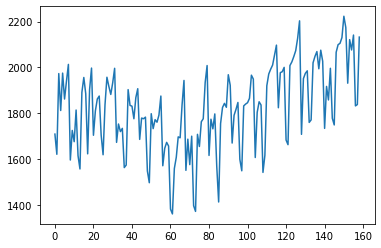

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot() 

# Splitting data

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12) 

# Moving Average 

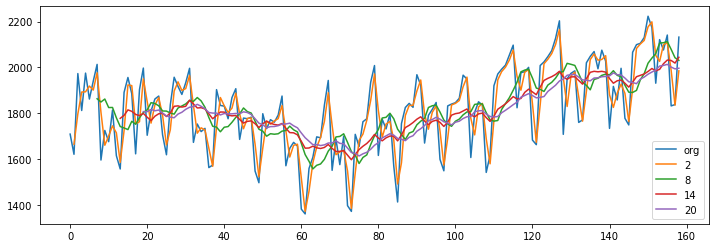

In [4]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

# Time series decomposition plot 


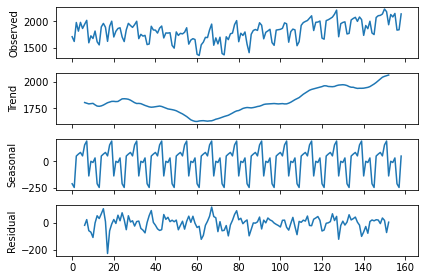

In [7]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq=12)
decompose_ts_add.plot()
plt.show() 

# ACF plots and PACF plots


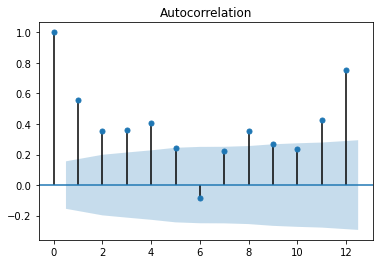

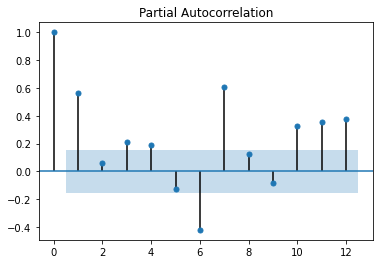

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show() 
 

### Evaluation Metric MAPE

In [12]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

### Simple Exponential Method


In [16]:
Train["Footfalls"] = Train["Footfalls"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls)   

C:\Users\varun\Anacond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


8.490637057828362

### Holt method 

In [17]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls)   

7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [25]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)  

C:\Users\varun\Anacond\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.1231708864230225

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [26]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)  

3.122149916009715

## Final Model by combining train and test

In [27]:
Walmart["Footfalls"] = Walmart["Footfalls"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()   

In [28]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)    

159    2156.833259
160    2188.369122
161    2147.195167
162    2264.113988
163    2305.969200
164    1932.234086
165    2098.710715
166    2084.822746
167    2136.725302
168    1857.872278
dtype: float64